## Problem Statement

With the ever-growing volume of music available on platforms such as Spotify, it has become increasingly difficult for users to discover new songs that match their preferences. Traditional recommendation systems often rely on collaborative filtering, which requires extensive user interaction data and may suffer from the "cold start" problem for new or less popular songs.

To address this, we aim to build a **content-based music recommendation system** that recommends similar songs to users by analyzing audio features directly. Using **the Kaggle Spotify dataset**, we will focus on key features like tempo, loudness, danceability, and energy, which are strong indicators of the musical style and mood of a track.

The system will apply **dimensionality reduction (PCA)** to handle feature complexity and highlight the most significant patterns in the data. Then, clustering algorithms (e.g., K-Means) will be used to group songs into clusters of similar characteristics. Given a particular track, the system will recommend other songs from the same cluster, thereby ensuring that the recommendations align with the track’s musical profile.

## Solving Approach

Imagine you are  listener who opens Spotify and feels overwhelmed by millions of songs. You want the system to “understand” the kind of song You enjoy and bring them similar tracks. How do we make this possible?

### Step 1: Collecting the Music DNA

 - Every song has a hidden signature — its tempo, loudness, energy, and how danceable it is. Think of these features as the DNA of music. Using the **Kaggle’s Spotify dataset**, we gather this DNA for thousands of songs.

### Step 2: Cleaning and Tuning the Data

 - Raw data is messy — some songs might have missing values, others might be on different scales (e.g., loudness in decibels vs. danceability between 0– 1).
- We carefully clean the dataset and scale features so that each attribute contributes fairly, like tuning the instruments before a concert.

### Step 3: Reducing the Noise with PCA

 - Imagine having too many musical attributes, making the picture blurry. With PCA (Principal Component Analysis), we distill these attributes into fewer dimensions while still preserving the essence.
Now, instead of juggling 10+ features, we can see songs in a simplified 2D/3D space, where similar songs sit closer together — like mapping a galaxy of music.

### Step 4: Grouping Songs into Clusters

 - Once songs are in this space, we need to find the natural groups. Using clustering algorithms like K-Means, we create clusters — perhaps one group of “energetic party songs,” another of “soft acoustic tunes,” and so on.
These clusters act like musical neighborhoods. Every song now has a “home.”

### Step 5: Making Recommendations

 - When a user picks a song, our system first asks: Which cluster does this song belong to?
Then, it searches within that neighborhood for other songs with the most similar DNA (measured by similarity metrics like cosine distance).
Finally, the system returns a playlist of Top-N recommended tracks — songs that feel like close friends of the original.

### Step 6: Testing the Experience
 
####     We evaluate our system in two ways:

 - Mathematically (Silhouette scores, variance explained by PCA) to ensure clusters are meaningful.

 - Musically — by actually listening and checking if recommended songs sound like they belong together.

### Let's Import Required Libraries
 - We Want Pandas For Data Handeling
 - Matplot And Seaborn For Visualization.
 - We Are Using KMeans For Segmentation.
 - PCA For Reducing Dimensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("sportify.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data.shape

(114000, 21)

####  We Have 114000 Rows And 21 Columns 

In [5]:
data.keys()

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#### We only wants Numerical Data

In [7]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### As From Above We Can See There Are No Null Values ; It Hve Some But We Can Ignore It.

<Axes: ylabel='energy'>

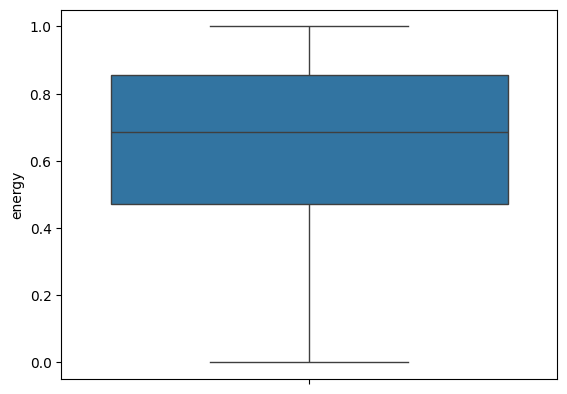

In [9]:
sns.boxplot(data["energy"])

(array([  629.,  2579.,  5525.,  9828., 17112., 23970., 24679., 18873.,
         9162.,  1643.]),
 array([0.    , 0.0985, 0.197 , 0.2955, 0.394 , 0.4925, 0.591 , 0.6895,
        0.788 , 0.8865, 0.985 ]),
 <BarContainer object of 10 artists>)

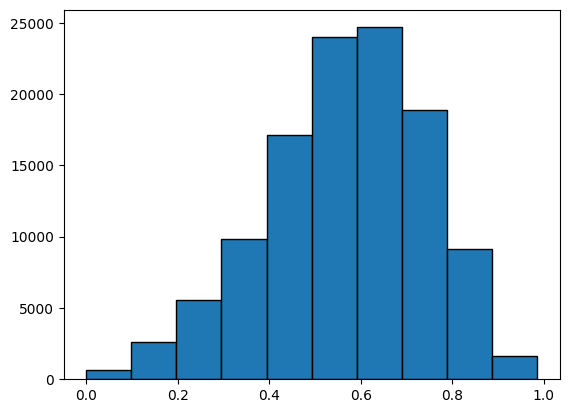

In [10]:
plt.hist(data["danceability"] ,bins = 10,edgecolor = 'black')

(array([4.0000e+00, 5.2000e+01, 2.6000e+02, 8.0400e+02, 1.7180e+03,
        3.8180e+03, 1.3029e+04, 4.6854e+04, 4.7104e+04, 3.5700e+02]),
 array([-49.531 , -44.1247, -38.7184, -33.3121, -27.9058, -22.4995,
        -17.0932, -11.6869,  -6.2806,  -0.8743,   4.532 ]),
 <BarContainer object of 10 artists>)

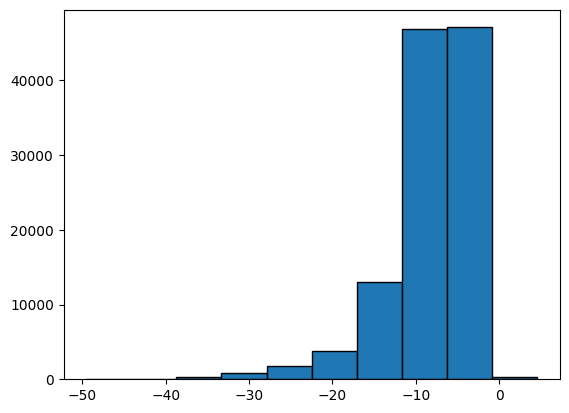

In [11]:
plt.hist(data["loudness"] ,bins = 10,edgecolor = 'black')

(array([1.5700e+02, 6.1000e+01, 2.5210e+03, 2.3823e+04, 2.9484e+04,
        3.4851e+04, 1.4262e+04, 7.7520e+03, 1.0780e+03, 1.1000e+01]),
 array([  0.    ,  24.3372,  48.6744,  73.0116,  97.3488, 121.686 ,
        146.0232, 170.3604, 194.6976, 219.0348, 243.372 ]),
 <BarContainer object of 10 artists>)

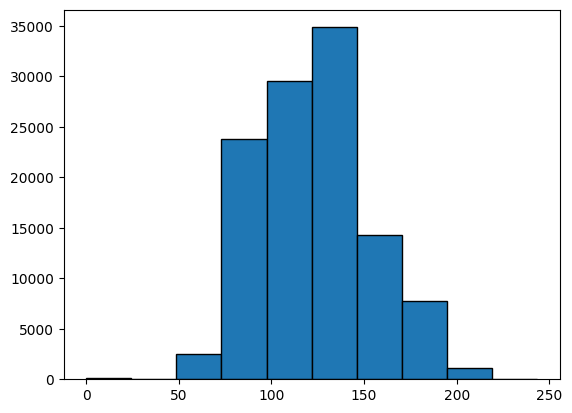

In [12]:
plt.hist(data["tempo"] ,bins = 10,edgecolor = 'black')

#### Selecting Features

In [13]:
new_data = data[["danceability", "energy", "loudness", "acousticness", "valence", "tempo"]]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   danceability  114000 non-null  float64
 1   energy        114000 non-null  float64
 2   loudness      114000 non-null  float64
 3   acousticness  114000 non-null  float64
 4   valence       114000 non-null  float64
 5   tempo         114000 non-null  float64
dtypes: float64(6)
memory usage: 5.2 MB


#### Selected Data IS Bit Noisy We Standardized By StandaradScaler.

In [14]:
Standard_data = StandardScaler().fit_transform(new_data)

#### We Reduce Standard_data Dimension to 2.

In [15]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(Standard_data)
pca_data = pd.DataFrame(pca_data, columns = ["column1", "column2"])

#### Let's Visualize Both Standard_data & pca_data .

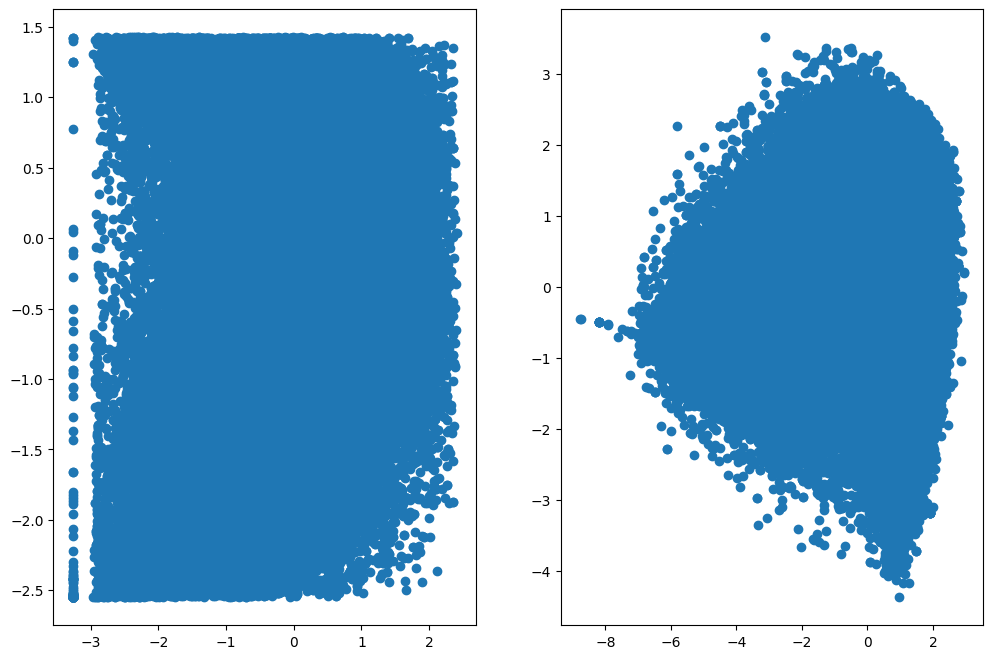

In [16]:
fig , ax = plt.subplots(1,2,figsize=(12,8))
ax[0].scatter(Standard_data[:,0],Standard_data[:,1])
ax[1].scatter(pca_data["column1"],pca_data["column2"])

#### Let's Fit KMeans For 1 Cluster Just By Guessing .

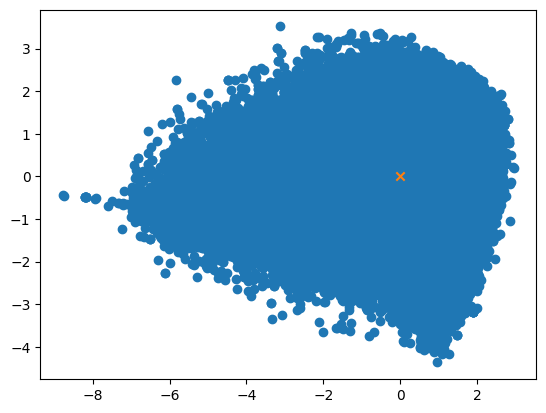

In [17]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(pca_data)
centroids = kmeans.cluster_centers_
plt.scatter(pca_data["column1"],pca_data["column2"])
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x')

### Ohhh! Our Guess Is Failed . Very Bad ; Let's Find Best Cluster Value By Elbow's Method .

In [18]:
inertia = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

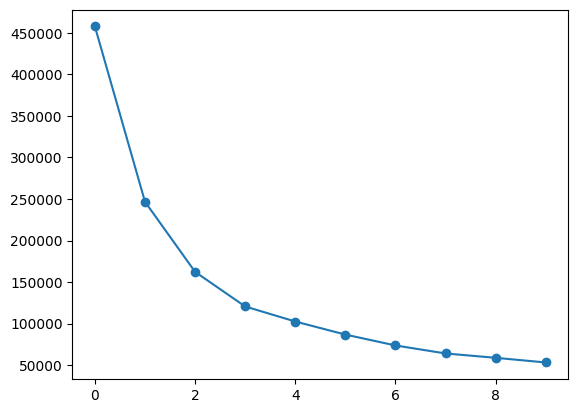

In [19]:
plt.plot(inertia , marker = 'o')

#### From Above Graph , Now  We Able To Tell That k Value 6 Is Best For Clusters.

In [20]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(pca_data)
centroids = kmeans.cluster_centers_
pca_data["Clusters"] = kmeans.labels_

#### Lets Find Out Cluster's Mean And It's Summary .

In [21]:
summary = pca_data.groupby("Clusters").mean()
summary

,column1,column2
Clusters,,
0,-1.904567,0.043161
1,0.587669,-1.721116
2,-0.390201,0.832843
3,-4.226573,-0.488749
4,1.150896,-0.348779
5,1.217868,1.123107


#### Now Visualizing Scattered Point With Clusters . 

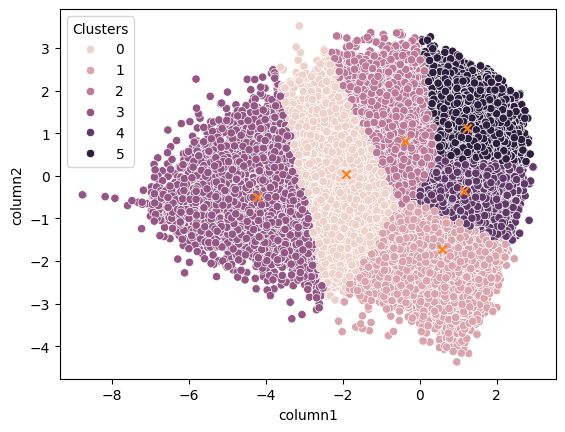

In [22]:
sns.scatterplot(x="column1",y="column2",hue = "Clusters",data =pca_data)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x')

### Each point here represents a song. Notice how energetic dance tracks form a distinct cluster away from mellow acoustic songs.

#### We Have Fitted KMeans With PCA Data What Happen If We Fit KMeans On Standard Data ; Might Get Better Result! . Let's Follow Our Insticts .

In [23]:
means = KMeans(n_clusters = 6)
kmeans.fit(Standard_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

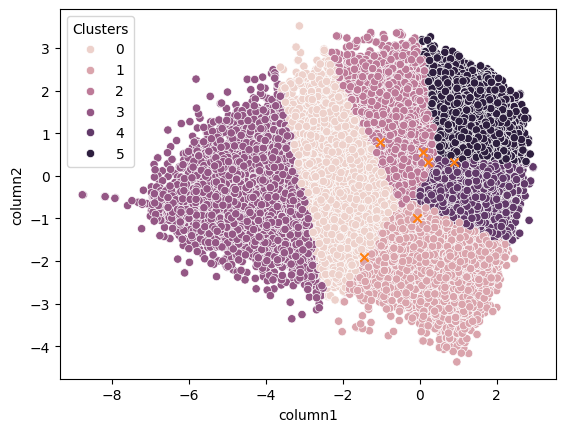

In [24]:
sns.scatterplot(x="column1",y="column2",hue = "Clusters",data =pca_data)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x')

#### Ohh! Man ; I Again Failed Guessing ; But We Get To Know That Standard Data Is Not Best For Fitting.

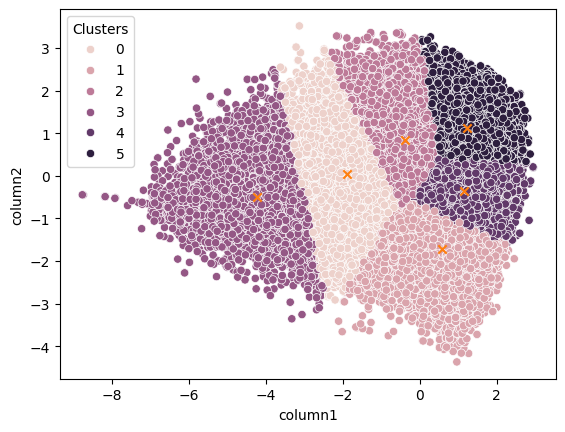

In [25]:
pca_centroids = pca_data.groupby("Clusters")[["column1","column2"]].mean().values
sns.scatterplot(x="column1",y="column2",hue = "Clusters",data =pca_data)
plt.scatter(pca_centroids[:,0],pca_centroids[:,1],marker = 'x')

In [36]:
idx = np.random.choice(len(pca_data), size=5000, replace=False)
score = silhouette_score(pca_data.iloc[idx], kmeans.labels_[idx])
print("Silhouette Score:", score)

Silhouette Score: 0.5337665487624861


#### After Tuning The Number Of Clusters And Refining Features, Our Model Achieved A Silhouette Score Of **0.53**, Indicating Strong Separation Between Musical Groups. This Suggests That The System Successfully Forms Coherent Neighborhoods Of Songs — For Example, Clustering Upbeat Dance Tracks Separately From Mellow Acoustic Songs — Which Directly Improves The Quality Of Recommendations.

### Now It's Time To Check Our Model.

In [32]:
def song_recommender(features,kmeans,pca,pca_data,scalar,n=5):
    scaled = scalar.transform([features])
    reduced_data = pca.transform(scaled)
    km = kmeans.predict(reduced_data)[0]
    recomended = pca_data[pca_data["Clusters"] == km ].sample(n).index
    return data.loc[recomended, ["track_name", "artists", "danceability", "energy", "tempo"]]

In [33]:
features_list = ["danceability", "energy", "loudness", "acousticness", "valence", "tempo"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features_list])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_pca)
pca_data = pd.DataFrame(X_pca, columns=["PC1","PC2"])
pca_data["Clusters"] = kmeans.labels_

In [34]:
new_song = [0.72, 0.88, -6.0, 0.15, 0.65, 125.0]
recommendation = song_recommender(new_song, kmeans, pca, pca_data, scaler)
recommendation

,track_name,artists,danceability,energy,tempo
23953,You've Done Enough,Gorgon City;DRAMA,0.685,0.791,125.052
66881,Bee Over There,Koo Koo Kanga Roo,0.826,0.933,130.034
28146,Mensagem Antiga,Cidade Verde Sounds,0.762,0.547,141.931
13415,Nite Roads,Jovonn,0.671,0.830,120.914
81364,Steal My Girl,One Direction,0.536,0.768,77.217


## Conclusion

#### We built a content-based music recommendation system using PCA for dimensionality reduction and K-Means clustering to group songs by audio features. 
#### The model achieved a Silhouette Score of **0.53**, showing clear separation between musical groups and validating the quality of recommendations.

#### This system demonstrates how unsupervised learning can enable playlist generation, new user personalization, and music discovery without relying on user history.